In [152]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [153]:
def euclidean(X, centroid):
    difference = X - centroid
    squared = difference ** 2
    total_sum = np.sum(squared, axis=1)
    return np.sqrt(total_sum)

In [154]:
def cosine(X, centroid):
    dot_prod = np.sum(X * centroid, axis=1)
    mag_x_vec = np.linalg.norm(X, axis=1)
    mag_c_vec = np.linalg.norm(centroid)
    # adding 1e-10 because denominator might be 0
    cosine_method = dot_prod / (mag_x_vec * mag_c_vec + 1e-10)
    return 1 - cosine_method

In [155]:
def jaccard(X, centroid):
    min_value = np.minimum(X, centroid)
    max_value = np.maximum(X, centroid)
    jaccard_method = np.sum(min_value, axis=1) / (np.sum(max_value, axis=1) + 1e-10)
    return 1 - jaccard_method

In [156]:
def kmeans_basic(csv, K, kmeans_method, max_iterations=300):
    np.random.seed(42)
    idx = np.random.choice(len(csv), K, replace=False)
    centroids = csv[idx]
    iteration_count = 0

    for iteration in range(max_iterations):
        iteration_count +=1
        distance_matrix = np.zeros((len(csv), K))
        for k in range(K):
            distance_matrix[:, k] = kmeans_method(csv, centroids[k])

        cluster_no = np.argmin(distance_matrix, axis=1)

        new_centroids = centroids.copy()
        for k in range(K):
            cluster_items = []
            for i in range(len(csv)):
                if cluster_no[i] == k: 
                    cluster_items.append(csv[i])
        
            cluster_items = np.array(cluster_items)
            if len(cluster_items) > 0:
                new_centroids[k] = cluster_items.mean(axis=0)
            else:
                new_centroids[k] = csv[np.random.choice(len(csv))]
            
        if np.allclose(new_centroids, centroids):
            break

        centroids = new_centroids

    euclidean_sse = 0
    specific_sse = 0
    
    for k in range(K):
        cluster_items_final = []
        for i in range(len(csv)):
            if cluster_no[i] == k:
                cluster_items_final.append(csv[i])
    
        cluster_items_final = np.array(cluster_items_final)
    
        if len(cluster_items_final) > 0:
            difference = cluster_items_final - centroids[k]
            squared = difference ** 2
            euclidean_sse_cluster = squared.sum()
            euclidean_sse += euclidean_sse_cluster

            specific_calc = kmeans_method(cluster_items_final, centroids[k])
            specific_sse_cluster = np.sum(specific_calc ** 2)
            specific_sse += specific_sse_cluster

    return centroids, cluster_no, euclidean_sse, specific_sse, iteration_count

In [157]:
def accuracy(cluster_labels, truth_labels, K):

    cluster_to_label = {}
    for k in range(K):
        cluster_items = []
        for i in range(len(cluster_labels)):
            if cluster_labels[i] == k:
                cluster_items.append(truth_labels[i])

        if len(cluster_items) > 0:
            majority_vote = max(set(cluster_items), key=cluster_items.count)
            cluster_to_label[k] = majority_vote
        else:
            cluster_to_label[k] = -1

    predicted = []
    for i in range(len(cluster_labels)):
        predicted.append(cluster_to_label[cluster_labels[i]])

    predicted = np.array(predicted)
    accuracy = np.mean(predicted == truth_labels)
    return accuracy

In [158]:
data = np.loadtxt("data.csv", delimiter=",")
print("Shape:", data.shape)

Shape: (10000, 784)


In [159]:
sse_list = []
for K in range(1,11):
    print(f"For K = {K} ...")
    _, _, sse, _, _ = kmeans_basic(data, K, euclidean)
    sse_list.append(sse)

For K = 1 ...
For K = 2 ...
For K = 3 ...
For K = 4 ...
For K = 5 ...
For K = 6 ...
For K = 7 ...
For K = 8 ...
For K = 9 ...
For K = 10 ...


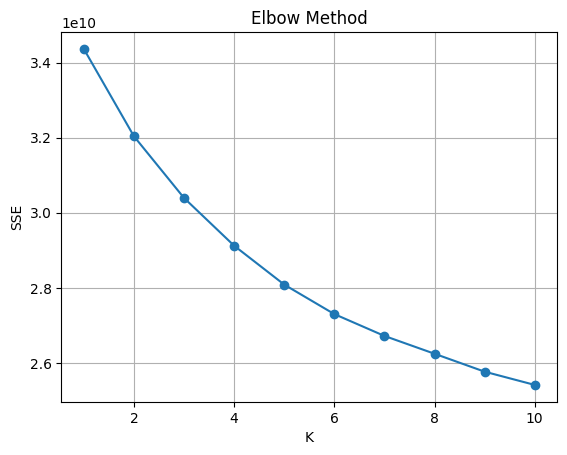

In [160]:
plt.plot(range(1,11), sse_list, marker='o')
plt.xlabel("K")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.grid()
plt.show()

In [161]:
# we choose the elbow point optimal k
optimal_k = int(input("Enter optimal K: "))

Enter optimal K:  6


In [162]:
centroids_final, clusters_final, sse_final, _, _ = kmeans_basic(data, optimal_k, euclidean)

In [163]:
print("\nFinal SSE:", sse_final)
print("Final Centroids shape:", centroids_final.shape)
print("Cluster labels shape:", clusters_final.shape)


Final SSE: 27301288434.869232
Final Centroids shape: (6, 784)
Cluster labels shape: (10000,)


In [164]:
# if cluster labels required 
# np.savetxt("scratch_cluster_assignment.csv", clusters_final, fmt="%d", delimiter=",")

In [165]:
y = np.loadtxt("label.csv", delimiter=",")
K_y = len(np.unique(y))
print("K is", K_y)

K is 10


In [166]:
sse_q1answer = {}
centroids_e, clusters_e, sse_e, _, iterations_e = kmeans_basic(data, K_y, euclidean)
sse_q1answer['Euclidean Method'] = sse_e
centroids_c, clusters_c, sse_e_cos, sse_c, iterations_c = kmeans_basic(data, K_y, cosine)
sse_q1answer['Cosine Method'] = (sse_e_cos,sse_c)
centroids_j, clusters_j, sse_e_jac, sse_j, iterations_j = kmeans_basic(data, K_y, jaccard)
sse_q1answer['Jaccard Method'] = (sse_e_jac,sse_j)
print("All basic kmeans completed")

All basic kmeans completed


In [167]:
print("Report for Basic K-Means (K = 10)")
for key, value in sse_q1answer.items():
    if key == 'Euclidean Method':
        print(f"{key}:")
        print(f"Euclidean SSE = {value}")
    else:
        eu_sse, metric_sse = value
        if key == 'Cosine Method':
            print(f"\n{key}:")
            print(f"Euclidean SSE = {eu_sse}")
            print(f"Cosine SSE    = {metric_sse}")
        elif key == 'Jaccard Method':
            print(f"\n{key}:")
            print(f"Euclidean SSE = {eu_sse}")
            print(f"Jaccard SSE   = {metric_sse}")

Report for Basic K-Means (K = 10)
Euclidean Method:
Euclidean SSE = 25414767689.961163

Cosine Method:
Euclidean SSE = 25489564392.276997
Cosine SSE    = 686.4355725684936

Jaccard Method:
Euclidean SSE = 25416346592.390205
Jaccard SSE   = 3660.3894937165805


In [168]:
acc_e = accuracy(clusters_e, y, K_y)
acc_c = accuracy(clusters_c, y, K_y)
acc_j = accuracy(clusters_j, y, K_y)

print("Euclidean Accuracy:"+ str(acc_e * 100) + "%")
print("Cosine Accuracy:"+ str(acc_c * 100) + "%")
print("Jaccard Accuracy:" + str(acc_j * 100) + "%")

Euclidean Accuracy:58.51%
Cosine Accuracy:63.09%
Jaccard Accuracy:60.209999999999994%


In [169]:
def kmeans_full(csv, K, kmeans_method, max_iterations=100):

    idx = np.random.choice(len(csv), K, replace=False)
    centroids = csv[idx]
    iteration_count = 0
    prev_sse = None

    for iteration in range(max_iterations):
        iteration_count += 1
        distance_matrix = np.zeros((len(csv), K))
        for k in range(K):
            distance_matrix[:, k] = kmeans_method(csv, centroids[k])

        cluster_no = np.argmin(distance_matrix, axis=1)
        new_centroids = centroids.copy()
        for k in range(K):
            cluster_items = []
            for i in range(len(csv)):
                if cluster_no[i] == k:
                    cluster_items.append(csv[i])

            cluster_items = np.array(cluster_items)
            if len(cluster_items) > 0:
                new_centroids[k] = cluster_items.mean(axis=0)
            else:
                new_centroids[k] = csv[np.random.choice(len(csv))]

        euclidean_sse = 0
        for k in range(K):
            cluster_items_final = []
            for i in range(len(csv)):
                if cluster_no[i] == k:
                    cluster_items_final.append(csv[i])

            cluster_items_final = np.array(cluster_items_final)
            if len(cluster_items_final) > 0:
                difference = cluster_items_final - new_centroids[k]
                euclidean_sse += np.sum(difference ** 2)

        if np.allclose(new_centroids, centroids):
            break

        if prev_sse is not None and euclidean_sse > prev_sse:
            break

        prev_sse = euclidean_sse
        centroids = new_centroids

    specific_sse = 0
    for k in range(K):
        cluster_items_final = []
        for i in range(len(csv)):
            if cluster_no[i] == k:
                cluster_items_final.append(csv[i])

        cluster_items_final = np.array(cluster_items_final)

        if len(cluster_items_final) > 0:
            specific_diff = kmeans_method(cluster_items_final, centroids[k])
            specific_sse += np.sum(specific_diff ** 2)

    return centroids, cluster_no, euclidean_sse, specific_sse, iteration_count

In [170]:
sse_q4answer = {}

In [171]:
start = time.time()
centroids_e, clusters_e, sse_e, _, iterations_e = kmeans_full(data, K_y, euclidean)
time_e = time.time() - start
sse_q4answer['Euclidean Method'] = sse_e
print("Euclidean method full kmeans completed for k=10")

Euclidean method full kmeans completed for k=10


In [172]:
start = time.time()
centroids_c, clusters_c, sse_e_cos, sse_c, iterations_c = kmeans_full(data, K_y, cosine)
time_c = time.time() - start
sse_q4answer['Cosine Method'] = (sse_e_cos,sse_c)
print("Cosine method full kmeans completed for k=10")

Cosine method full kmeans completed for k=10


In [173]:
start = time.time()
centroids_j, clusters_j, sse_e_jac, sse_j, iterations_j = kmeans_full(data, K_y, jaccard)
time_j = time.time() - start
sse_q4answer['Jaccard Method'] = (sse_e_jac,sse_j)
print("Jaccard method full kmeans completed for k=10")

Jaccard method full kmeans completed for k=10


In [174]:
print(f"Euclidean: {iterations_e} iterations, Time = {time_e} sec")
print(f"Cosine: {iterations_c} iterations, Time = {time_c} sec")
print(f"Jaccard: {iterations_j} iterations, Time = {time_j} sec")

Euclidean: 29 iterations, Time = 37.86792731285095 sec
Cosine: 41 iterations, Time = 65.55282878875732 sec
Jaccard: 31 iterations, Time = 58.6516637802124 sec


In [175]:
print("Report for Q4 Full K-Means (K = 10)")
for key, value in sse_q4answer.items():
    if key == 'Euclidean Method':
        print(f"{key}:")
        print(f"Euclidean SSE = {value}")
    else:
        eu_sse, metric_sse = value
        if key == 'Cosine Method':
            print(f"\n{key}:")
            print(f"Euclidean SSE = {eu_sse}")
            print(f"Cosine SSE    = {metric_sse}")
        elif key == 'Jaccard Method':
            print(f"\n{key}:")
            print(f"Euclidean SSE = {eu_sse}")
            print(f"Jaccard SSE   = {metric_sse}")

Report for Q4 Full K-Means (K = 10)
Euclidean Method:
Euclidean SSE = 25494253591.069286

Cosine Method:
Euclidean SSE = 25565269783.174164
Cosine SSE    = 691.9697033586797

Jaccard Method:
Euclidean SSE = 25419713047.908493
Jaccard SSE   = 3660.907465853162
